<a href="https://colab.research.google.com/github/FlexliTushar/Flow-Charts/blob/main/TMSDynamicInfeedFeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMS Dynamic Infeed Management

## Strategy for dynamic case (Policy 2)


In [ ]:
// simulated bot will send this to messaging server which will update this in bot_position.json file
if(assignedStation == DroppingStation)
{
  SEND bot_position with Rule D;
}
else
{
  SEND bot_position with Rule N;
}
// Inside TMS
GET unresolvedBotPositions;
if(DynamicInfeedFlag == True)
{
  // using dynamicinfeedpolicy class
  UPDATE IOPH Table;
  // Refer GetOptimisedInfeed Flow Chart
  GET optimisedInfeedStations for
  unresolvedBotPositions with Rule = D;
  PASS optimised infeeds in the 
UpdateMotorStatus method;
}
WRITE Bot Motor;
if(DynamicInfeedFlag == True)
{
  if(bot is REDIRECTED)
    Return Rule = R & 
    InfeedStation = original infeed;
    
  // optimised infeed will be available in the optimalInfeeds list
  else
    Return Rule = D &
    InfeedStation = optimised infeed;
}
// Bot reads the response
if Bot READS Rule == D
{
  // new planned_path = current station to dropOff + drop off to the optimnal infeed in the response
  RECALCULATE Planned_Path
  REASSIGN Infeed_Station;
}
Next Iteration of Bot Loop;

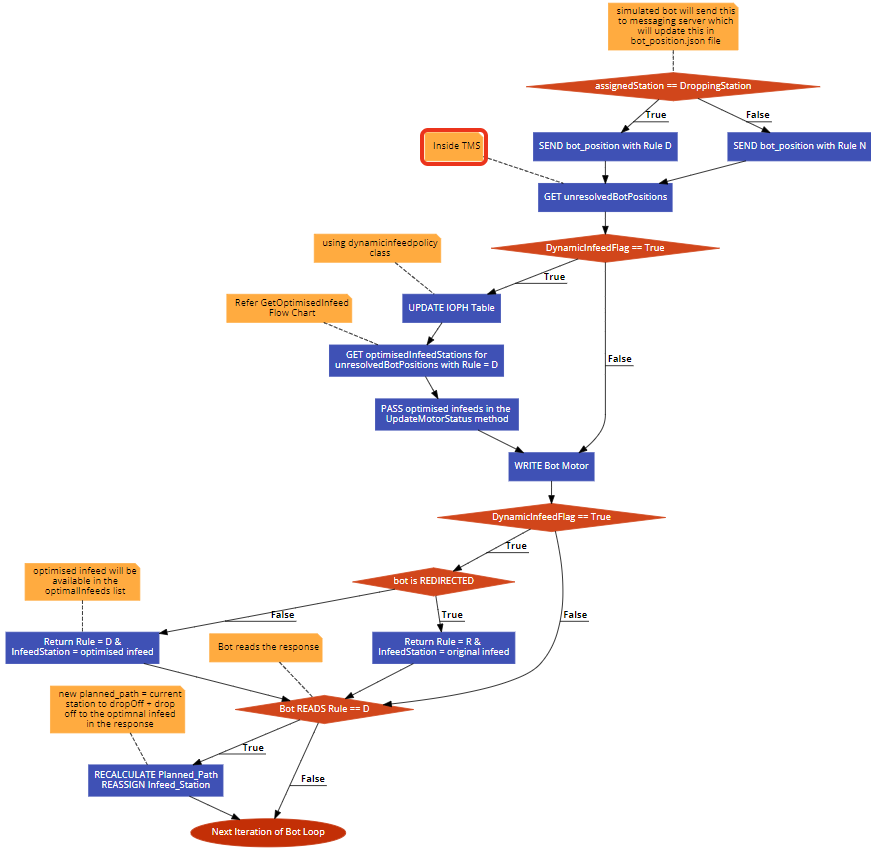

## GetOptimalInfeedForTheBot


In [ ]:
GetOptimisedInfeedForTheBot;
// minDist is a parameter
if (distance from original
infeed <= minDist)
{
  return Return Original Infeed;
}

CALCULATE congestionRatios;
for(each operational infeed)
{
  // total occupying bot refers to for eg. bot B is 'd' distance away from I2 so all the bots whose distance is less than or equal to 'd'
  // maxQueue is a parameter
  if(total occupying bots > maxQueue)
    continue;
  // distance = 'd'
  Ratio = (total occupying bots/distance);
  ADD [infeed : (total occupying bots, ratio)]
  in congestionRatios;
}

if(congestionRatios == null)
{
  return Return Original Infeed;
}

// filter out congestion ratios which are less than or equal to congestionthreshold(Ir)
FIND filteredRatios;
if(filteredRatios != NULL)
{
  FIND infeeds which have total occupying 
  bots less than equal to minQueue;
  // suppose 2 infeeds I1 = 2 occupying bots and I2 = 3 occupying bots and minQueue = 4, then I1 and I2 both are candidates, return min. of all of them i.e. I1
  if(such infeeds EXIST)
  {
    return Return min. of all
    such infeeds;
  }
  else
  {
    // waiting time = time required by extra bots (bots extra than minQueue) to clear the infeed - time required by the bot to reach upto minDist
    FIND the infeed with least
    waiting time from filteredRatios;
    return Return infeed with least
    waiting time;
  }
}
else
{
  FIND the infeed with least
  waiting time from congestionRatios;
  return Return infeed with least
  waiting time;
}




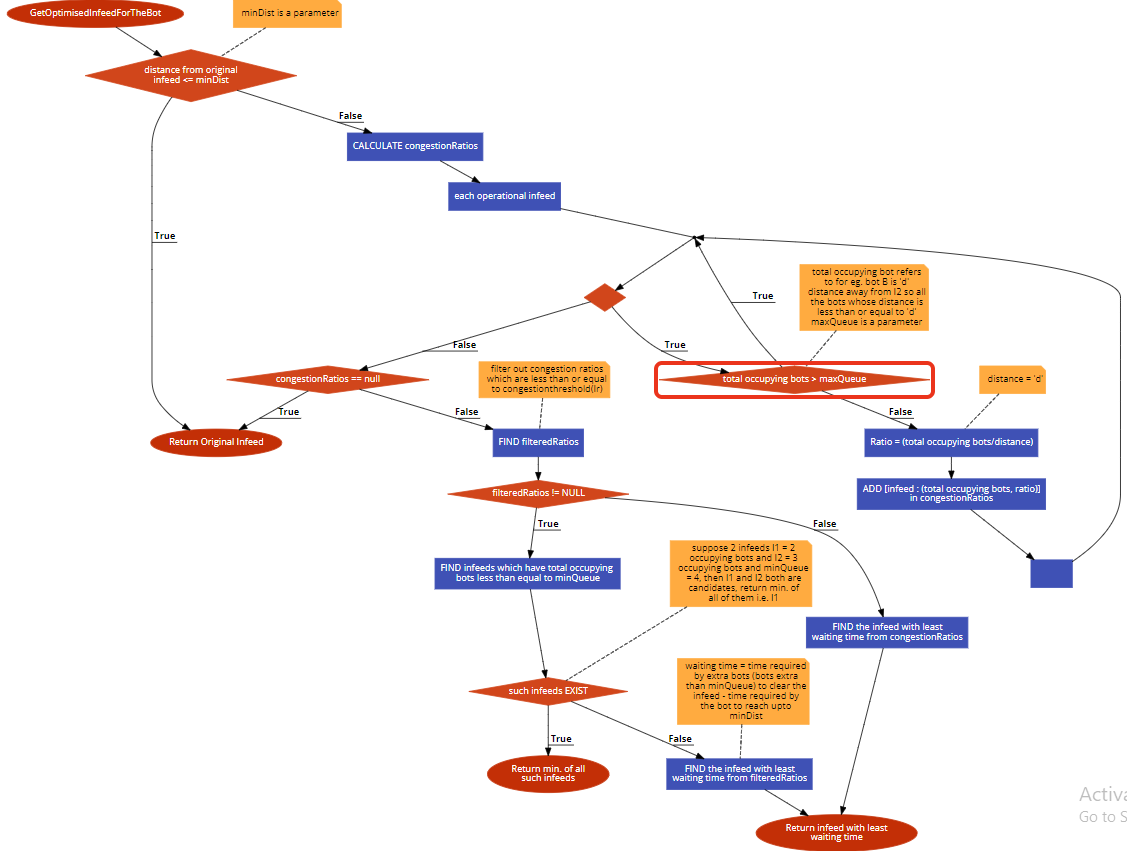